# import most library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# loading data

In [2]:
trainpath = '/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/'
testpath = '/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TEST/'
predpath = '/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TEST_SIMPLE/'

# information about data

In [3]:
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder +'/*.jpeg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2478 in folder MONOCYTE
For training data , found 2499 in folder NEUTROPHIL
For training data , found 2483 in folder LYMPHOCYTE
For training data , found 2497 in folder EOSINOPHIL


In [4]:
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpeg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 620 in folder MONOCYTE
For testing data , found 624 in folder NEUTROPHIL
For testing data , found 620 in folder LYMPHOCYTE
For testing data , found 623 in folder EOSINOPHIL


In [5]:
for folder in  os.listdir(predpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpeg'))
    print(f'For valadition data , found {len(files)} in folder {folder}')

For valadition data , found 620 in folder MONOCYTE
For valadition data , found 624 in folder NEUTROPHIL
For valadition data , found 620 in folder LYMPHOCYTE
For valadition data , found 623 in folder EOSINOPHIL


# encoding catagry

In [6]:
code = {'EOSINOPHIL':0 ,'LYMPHOCYTE':1,'MONOCYTE':2,'NEUTROPHIL':3}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

# reading traning data and print sampel

In [7]:
s = 100
X_train = []
y_train = []
data = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        data.append([list(image_array), code[folder]])
        X_train.append(list(image_array))
        y_train.append(code[folder])

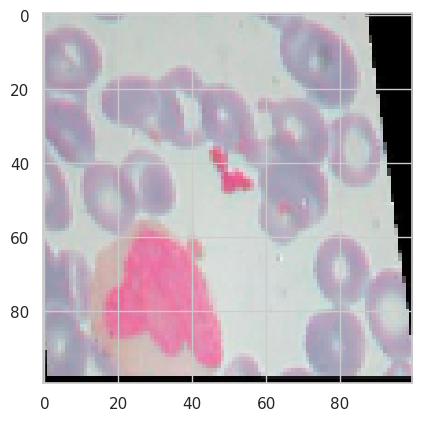

MONOCYTE


In [8]:
plt.imshow(X_train[0])
plt.show()
print(getcode(y_train[0]))

# reading testing data and print sampel

In [9]:
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str(testpath + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        data.append([list(image_array), code[folder]])
        X_test.append(list(image_array))
        y_test.append(code[folder])

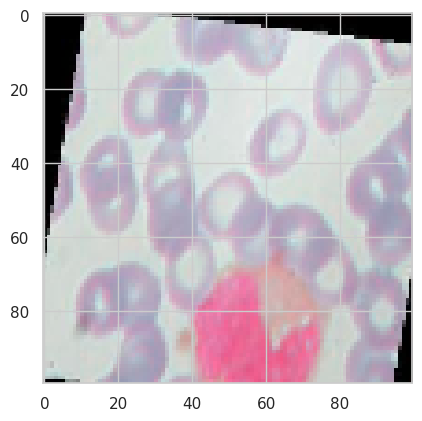

MONOCYTE


In [10]:
plt.imshow(X_test[0])
plt.show()
print(getcode(y_test[0]))

# reading validation data and print sampel

In [11]:
X_val = []
y_val = []
for folder in  os.listdir(predpath) : 
    files = gb.glob(pathname= str(predpath + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        data.append([list(image_array), code[folder]])
        X_val.append(list(image_array))
        y_val.append(code[folder])

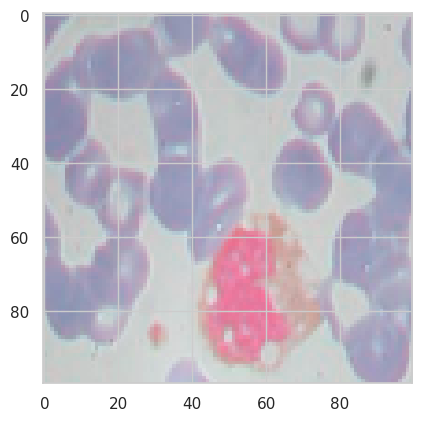

MONOCYTE


In [12]:
plt.imshow(X_val[0])
plt.show()
print(getcode(y_test[0]))

# to random data

In [13]:
import random
random.shuffle(data)
for simple in data[:10]:
    print(simple[1])

3
2
0
3
2
1
2
1
2
0


In [14]:
x = []
y = []

for feature,lable in data:
    x.append(feature)
    y.append(lable)

x = np.asarray(x)
y = np.asarray(y)

In [15]:
print(len(x))
print(len(y))

12515
12515


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=16)

# print shape of training and testing

In [17]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'X_train shape  is {x_train.shape}')
print(f'X_test shape  is {x_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (8134, 100, 100, 3)
X_test shape  is (4381, 100, 100, 3)
y_train shape  is (8134,)
y_test shape  is (4381,)


# normalization

In [18]:
x_train = x_train /255
x_test = x_test /255

# Build the model

In [19]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(30,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(100,100,3)),
        keras.layers.Conv2D(25,kernel_size=(3,3),activation=tf.nn.relu),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(15,kernel_size=(5,5),activation=tf.nn.relu),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(8,kernel_size=(3,3),activation=tf.nn.relu),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten(), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(256,activation=tf.nn.leaky_relu) ,  
        keras.layers.Dense(150,activation=tf.nn.relu) ,  
        keras.layers.Dropout(rate=0.5) ,   
        keras.layers.Dense(100,activation=tf.nn.relu),
        keras.layers.Dense(16,activation=tf.nn.relu),
        keras.layers.Dense(4,activation=tf.nn.softmax),   
        ])

In [20]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 30)        840       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 25)        6775      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 25)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 15)        9390      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 15)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None,

# training model 

In [21]:
epochs = 12
ThisModel = KerasModel.fit(x_train, y_train, epochs=epochs,verbose=1)

Epoch 1/12
255/255 [==============================] - 11s 15ms/step - loss: 1.3111 - accuracy: 0.3532
Epoch 2/12
255/255 [==============================] - 4s 15ms/step - loss: 1.0113 - accuracy: 0.5338
Epoch 3/12
255/255 [==============================] - 4s 16ms/step - loss: 0.7968 - accuracy: 0.6430
Epoch 4/12
255/255 [==============================] - 4s 15ms/step - loss: 0.6643 - accuracy: 0.6865
Epoch 5/12
255/255 [==============================] - 4s 14ms/step - loss: 0.6244 - accuracy: 0.7187
Epoch 6/12
255/255 [==============================] - 4s 15ms/step - loss: 0.5566 - accuracy: 0.7440
Epoch 7/12
255/255 [==============================] - 4s 15ms/step - loss: 0.4933 - accuracy: 0.7767
Epoch 8/12
255/255 [==============================] - 4s 15ms/step - loss: 0.4572 - accuracy: 0.7921
Epoch 9/12
255/255 [==============================] - 4s 15ms/step - loss: 0.4099 - accuracy: 0.8169
Epoch 10/12
255/255 [==============================] - 4s 15ms/step - loss: 0.4430 - accur

# testing model 

In [22]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

137/137 [==============================] - 1s 7ms/step - loss: 0.7089 - accuracy: 0.7199
Test Loss is 0.7089077830314636
Test Accuracy is 0.7199269533157349


In [23]:
KerasModel.save('NN.h5')